# Demo: Defining Control_M Workflows using Python

# Step 1 - Setup

## Step 1A - Install the library

In [1]:
!pip --version

pip 21.2.4 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
!pip install git+https://github.com/tadinve/ctm_python_client.git

  Cloning https://github.com/tadinve/ctm_python_client.git to /tmp/pip-req-build-kb0g3mll
  Running command git clone -q https://github.com/tadinve/ctm_python_client.git /tmp/pip-req-build-kb0g3mll
  Resolved https://github.com/tadinve/ctm_python_client.git to commit 62acc49acf59bc9494cae016ee2a3df5d8ba6d35
  Created wheel for ctm-python-client: filename=ctm_python_client-0.3.0-py3-none-any.whl size=1158324 sha256=0836d21e319036d1a93b325596ce4d6710e38310112f03b4d56ee3e80e77d8b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-zf1ego9j/wheels/30/51/3d/ed0afc33329fe5f00ec693887200c9dbff52ff29ff02843134
Successfully built ctm-python-client
You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import os
from ctm_python_client.core.bmc_control_m import CmJobFlow
from ctm_python_client.jobs.dummy import DummyJob

# Step 2 - Instantiate, Authenticate and Schedule


## Step 2A - Define the Connection Variables

In [4]:
# Create a file .secrets with the following three lines. One for uri, one for user and one for password.
"""
https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/automation-api
username
password
"""
import os

BASE_PATH = os.path.abspath("")
with open(BASE_PATH + "/.secrets", "r") as fp:
    ctm_uri = fp.readline().strip()
    ctm_user = fp.readline().strip()
    ctm_pwd = fp.readline().strip()

## Step 2B - Create the object

In [5]:
from ctm_python_client.session.session import Session

session = Session(endpoint=ctm_uri, username=ctm_user, password=ctm_pwd)
session.get_token()

'D861D79ED7C1736300E6FAE11405A7B4291716A6B3B5C9FB7FE96ABD993DB1172B005117D36F27B548FE74842ED394905285A7CF0C0C5841A7EEB6217159BA15'

In [6]:
t1_flow = CmJobFlow(
    application="Naga0.2_Demo", sub_application="Demo-02", session=session, ctm_uri=ctm_uri
)

## Step 2C - Define the Schedule

In [7]:
t1_flow.set_run_as(username="ctmuser", host="acb-rhctmv20")

In [8]:
# Define the schedule
months = ["JAN", "OCT", "DEC"]
monthDays = ["ALL"]
weekDays = ["MON", "TUE", "WED", "THU", "FRI"]
fromTime = "0300"
toTime = "2100"
t1_flow.set_schedule(months, monthDays, weekDays, fromTime, toTime)

# Step 3  - Create Folder

In [9]:
# Create Fodler
f1 = t1_flow.create_folder(name="HelloWorld")

# Step 4 - Create Tasks

In [10]:
start = t1_flow.add_job(f1, DummyJob(f1, "Start-Flow"))

end = t1_flow.add_job(f1, DummyJob(f1, "End-Flow"))

hello_world_id = t1_flow.add_job(f1, DummyJob(f1, "Hello-World"))

# Step 5 - Chain Tasks

In [11]:
# start >>  hello_world_id >> end
t1_flow.chain_jobs(f1, [start, hello_world_id, end])

# Step 6 - Display Workflow

## Step 6A - Display DAG

In [12]:
# View the t1_flow Details
nodes, edges = t1_flow.get_nodes_and_edges()
nodes, edges

([('Start-Flow', <ctm_python_client.jobs.dummy.DummyJob at 0x7f2ada13dd30>),
  ('End-Flow', <ctm_python_client.jobs.dummy.DummyJob at 0x7f2ada13da00>),
  ('Hello-World', <ctm_python_client.jobs.dummy.DummyJob at 0x7f2ada13db50>)],
 [('Start-Flow', 'Hello-World', 'solid'),
  ('Hello-World', 'End-Flow', 'solid')])

=========== Jobflow Details ===================
Application:  Naga0.2_Demo
Sub Application:  Demo-02
Folder Name: HelloWorld 



('Start-Flow', 'Hello-World', 'solid')
('Hello-World', 'End-Flow', 'solid')


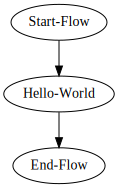

In [13]:
# display using graphviz
from ctm_python_client.utils.displayDAG import DisplayDAG

# sudo apt-get install graphviz (on unix)
#  or
# brew install graphviz (for mac)
DisplayDAG(t1_flow).display_graphviz()

## Step 6B - Display JSON

In [14]:
t1_flow.display_json()

{
    "Defaults": {
        "Application": "Naga0.2_Demo",
        "SubApplication": "Demo-02",
        "RunAs": "ctmuser",
        "Host": "acb-rhctmv20",
        "When": {
            "Months": [
                "JAN",
                "OCT",
                "DEC"
            ],
            "MonthDays": [
                "ALL"
            ],
            "WeekDays": [
                "MON",
                "TUE",
                "WED",
                "THU",
                "FRI"
            ],
            "FromTime": "0300",
            "ToTime": "2100"
        }
    },
    "HelloWorld": {
        "Type": "Folder",
        "Start-Flow": {
            "Type": "Job:Dummy",
            "eventsToAdd": {
                "Type": "AddEvents",
                "Events": [
                    {
                        "Event": "Start-Flow-TO-Hello-World"
                    }
                ]
            }
        },
        "End-Flow": {
            "Type": "Job:Dummy"
        },
        "Hel

# Step 7 - Submit Workflow to Control-M

In [15]:
t1_flow.deploy()



Successfully deployed to Control-M
	Application:  Naga0.2_Demo
	Sub Application:  Demo-02
	Folder Name:  HelloWorld
Login to https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/ControlM/ and use your workflow


[{'deployed_calendars': None,
  'deployed_connection_profiles': None,
  'deployed_drivers': None,
  'deployed_folders': ['HelloWorld'],
  'deployed_jobs': None,
  'deployment_file': 'jobs.json',
  'errors': None,
  'is_deploy_descriptor_valid': False,
  'successful_calendars_count': None,
  'successful_connection_profiles_count': 0,
  'successful_drivers_count': 0,
  'successful_folders_count': 0,
  'successful_jobs_count': 3,
  'successful_smart_folders_count': 1,
  'successful_sub_folders_count': 0,
  'warnings': None}]

In [16]:
t1_flow.run()



Successfully Ran job on Control-M
	Application:  Naga0.2_Demo
	Sub Application:  Demo-02
	Folder Name:  HelloWorld
Login to https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/ControlM/ and use your workflow


{'monitor_page_uri': None,
 'run_id': '97a8a4ed-8423-4366-bf37-9819c78deaf3',
 'status_uri': 'https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/automation-api/run/status/97a8a4ed-8423-4366-bf37-9819c78deaf3'}